### Imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import warnings
from zipfile import ZipFile

### Unzipping data

In [5]:
# get the current working directory
PWD = os.getcwd()
PWD

'/media/sidratul/DATA/Coding/walmart_sales_forecasting'

In [6]:
# change the working directory to the data directory
os.chdir(f'{PWD}/data')

In [7]:
# extract all zip files in the data directory
for file in os.listdir():
    if file.endswith('.zip'):
        with ZipFile(file, 'r') as zip_ref:
            zip_ref.extractall()

### Load data into memory

In [8]:
# load the data
train_df = pd.read_csv(os.path.join(f'{PWD}/data', "train.csv"))
store_df = pd.read_csv(os.path.join(f'{PWD}/data', "stores.csv"))
feature_df = pd.read_csv(os.path.join(f'{PWD}/data', "features.csv"))

### Exploratory data analysis

In [5]:
# check the first few rows of the data
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [7]:
# check column information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


Let's convert Date to a date-time type.

In [8]:
train_df['Date'] = pd.to_datetime(train_df['Date'])

In [9]:
feature_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [10]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


- Lot of null values in the markdown columns.
- Need to convert date columns.

In [11]:
feature_df['Date'] = pd.to_datetime(feature_df['Date'])

In [12]:
store_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


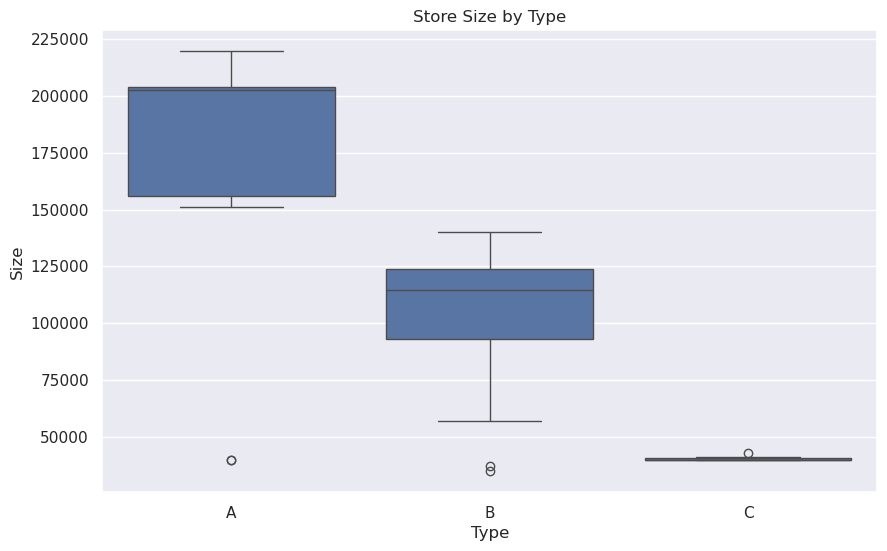

In [13]:
# plot box plot of store size by type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Size', data=store_df)
plt.title('Store Size by Type')
plt.show()

### Merge with additional features

In [14]:
# merge the features with the train data
train_df = train_df.merge(store_df, how='left', on = 'Store').merge(feature_df, how='left', on=['Store', 'Date', 'IsHoliday'])
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


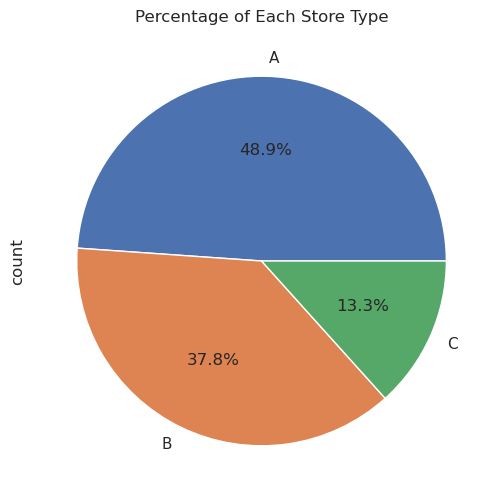

In [15]:
# plot percentage of each store type in the stores df
plt.figure(figsize=(10, 6))
store_df['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of Each Store Type')
plt.show()

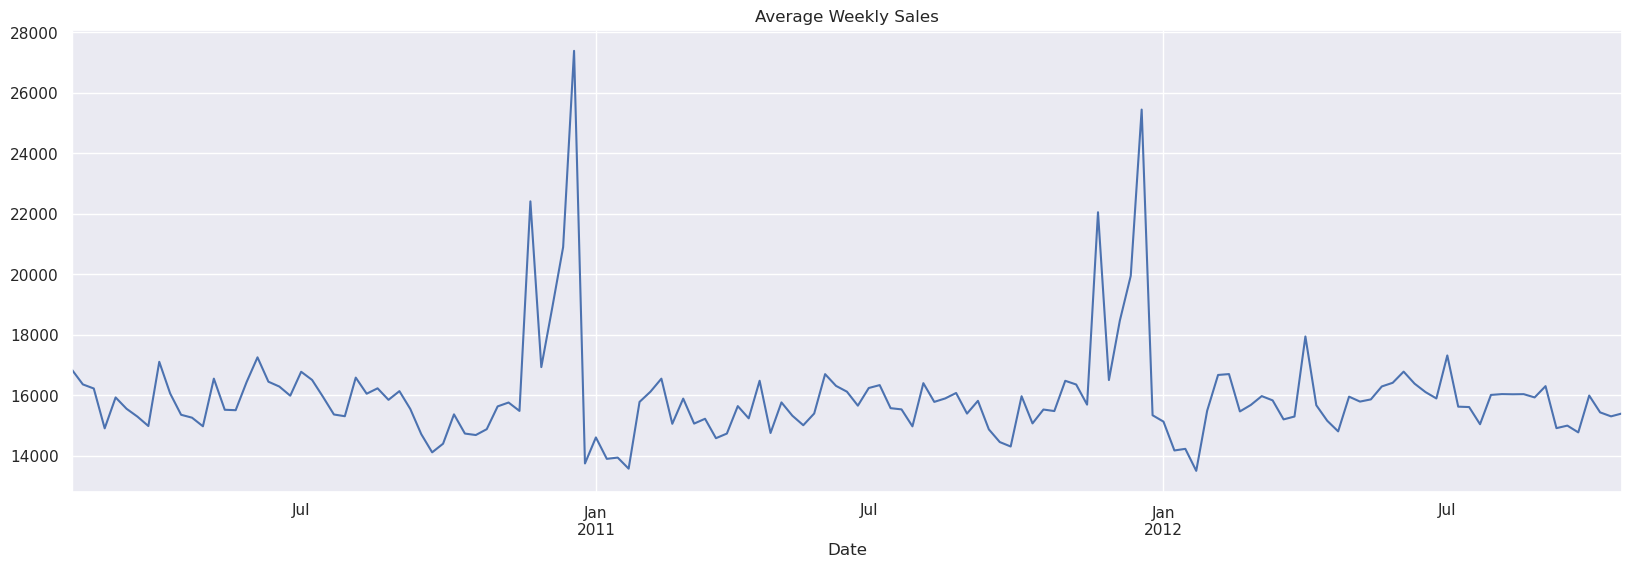

In [16]:
# calculate and plot average weekly sales
weekly_sales = train_df.groupby('Date')['Weekly_Sales'].mean()
plt.figure(figsize=(20, 6))
weekly_sales.plot()
plt.title('Average Weekly Sales')
plt.show()

In [17]:
# find weeks with abnormally high sales and join with the features data to check if there is a holiday
abnormal_sales = train_df[train_df['Weekly_Sales'] > 300000]
abnormal_sales = abnormal_sales.merge(feature_df, how='left', on=['Store', 'Date', 'IsHoliday'])
abnormal_sales[['Date', 'Store', 'Dept', 'Weekly_Sales', 'IsHoliday']]

,Date,Store,Dept,Weekly_Sales,IsHoliday
0,2011-12-23,4,7,318422.01,False
1,2010-11-26,4,72,381072.11,True
2,2011-11-25,4,72,385051.04,True
3,2010-11-26,6,72,342578.65,True
4,2011-11-25,6,72,326866.60,True
5,2010-12-24,10,7,406988.63,False
6,2011-12-23,10,7,341308.00,False
7,2010-11-26,10,72,693099.36,True
8,2010-12-24,10,72,404245.03,False
9,2011-11-25,10,72,630999.19,True


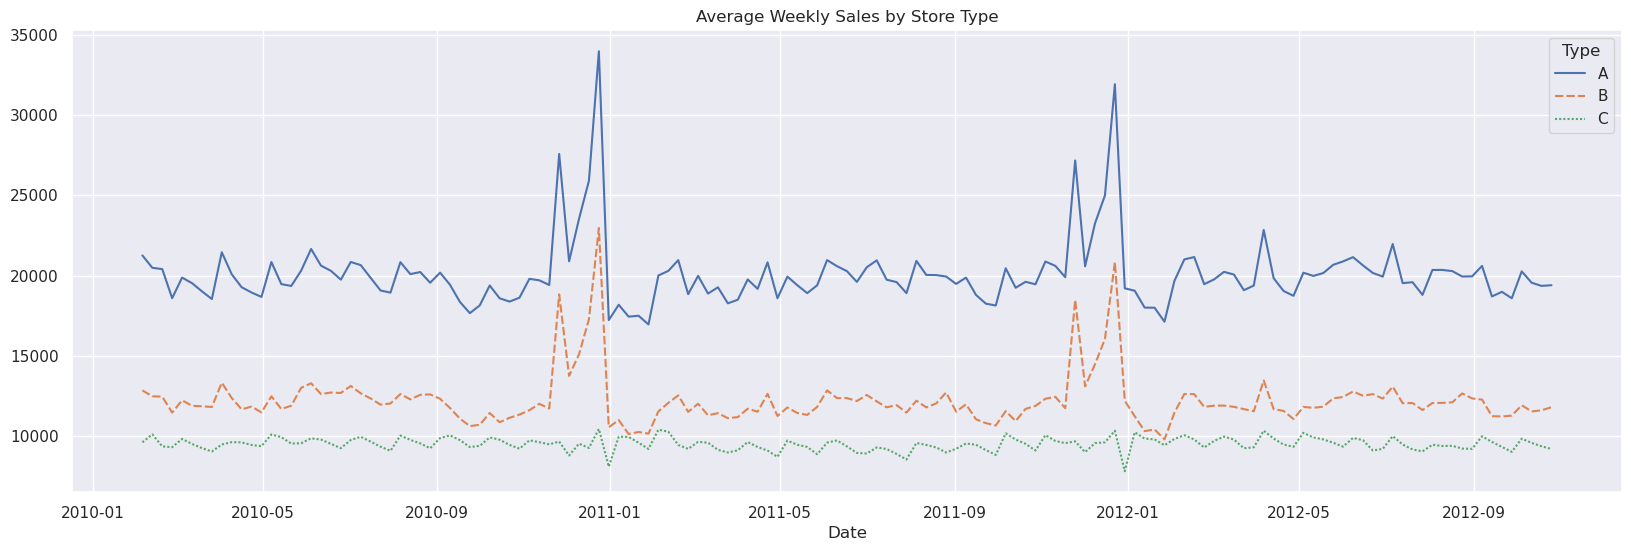

In [18]:
# calculate and plot average weekly sales by store type using sns
weekly_sales_type = train_df.groupby(['Date', 'Type'])['Weekly_Sales'].mean().unstack()
plt.figure(figsize=(20, 6))
sns.lineplot(data=weekly_sales_type)
plt.title('Average Weekly Sales by Store Type')
plt.show()


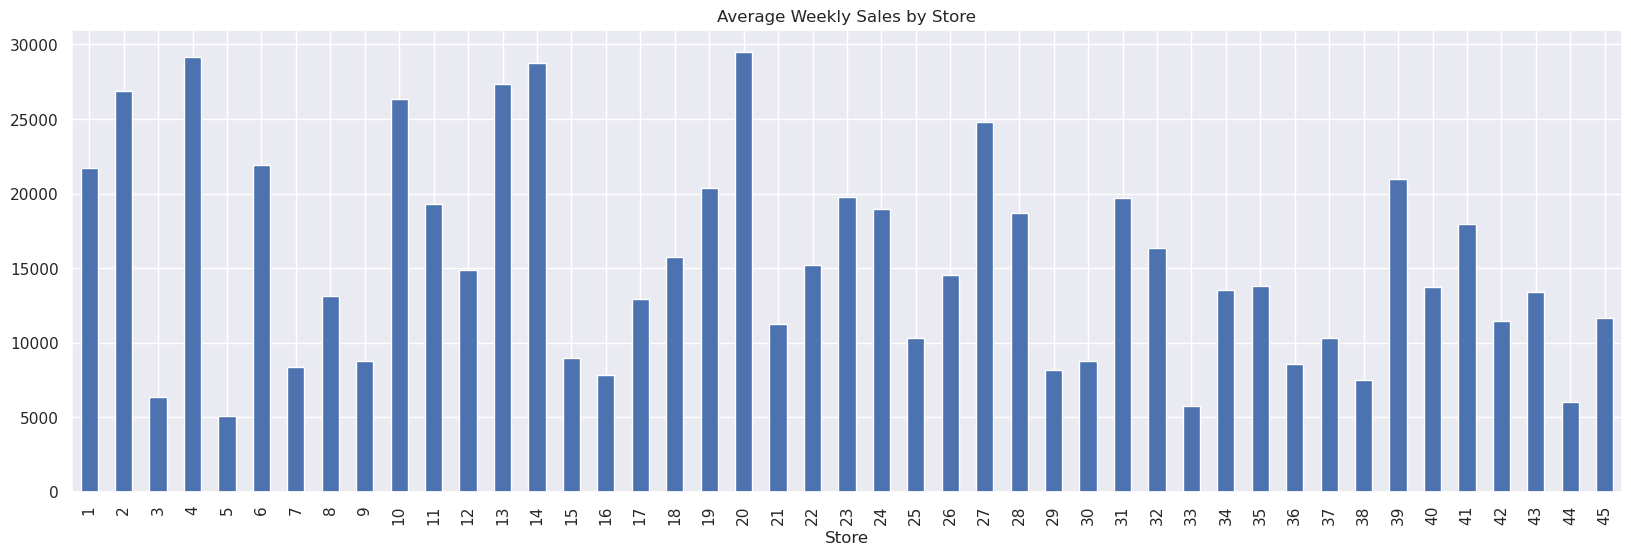

In [19]:
# calculate and plot bar chart of average weekly sales by store
weekly_sales_store = train_df.groupby('Store')['Weekly_Sales'].mean()
plt.figure(figsize=(20, 6))
weekly_sales_store.plot(kind='bar')
plt.title('Average Weekly Sales by Store')
plt.show()



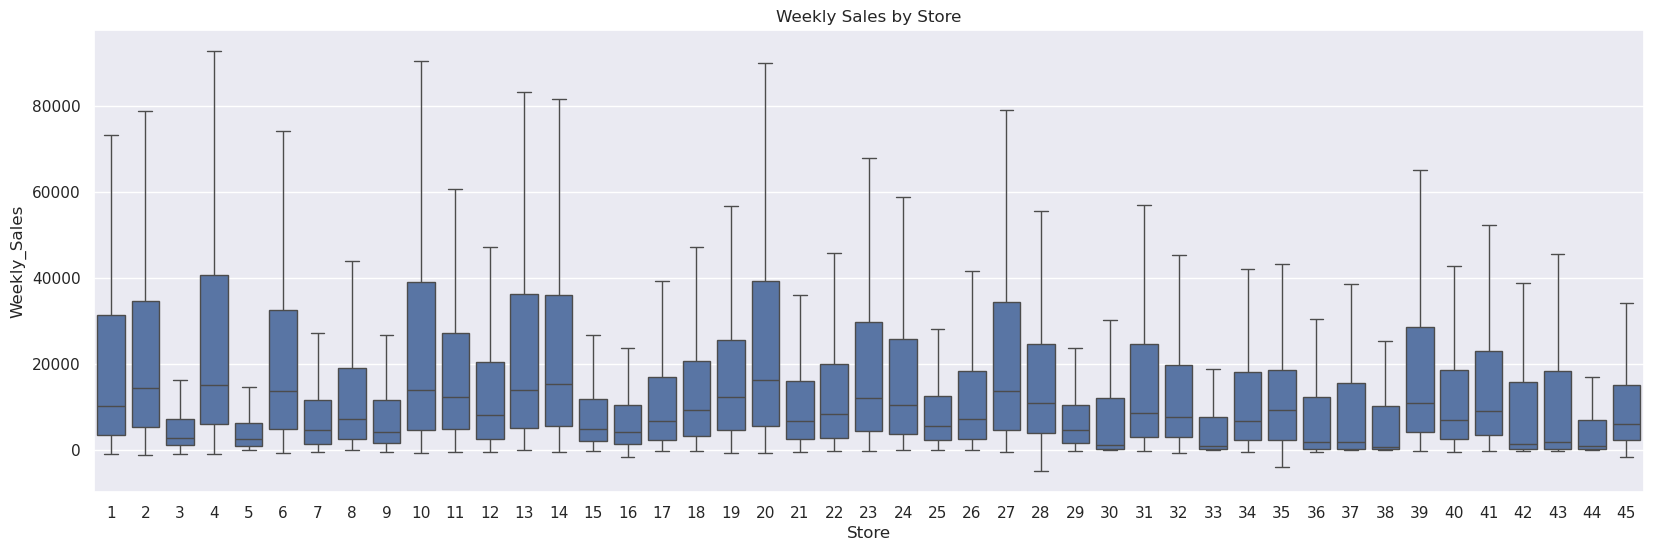

In [20]:
# Boxplot of weekly sales by store
plt.figure(figsize=(20, 6))
sns.boxplot(x='Store', y='Weekly_Sales', data=train_df, showfliers=False)
plt.title('Weekly Sales by Store')
plt.show()

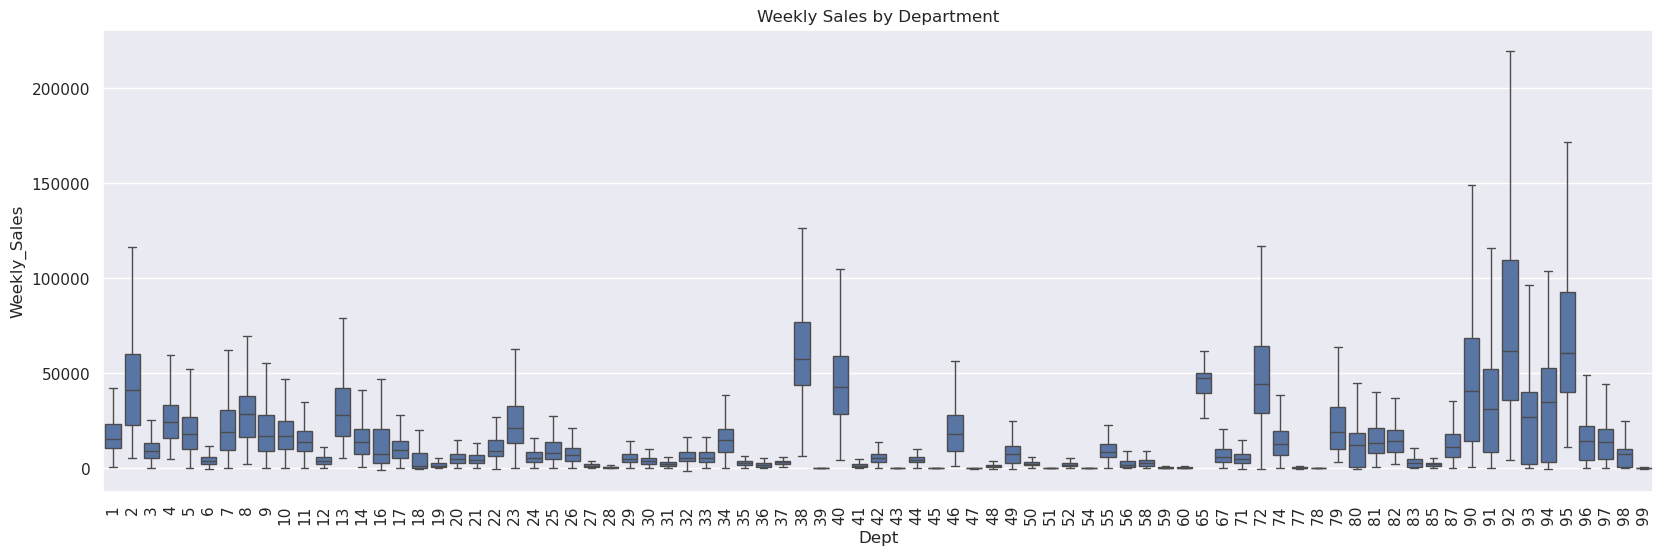

In [21]:
# Boxplot of weekly sales by department
plt.figure(figsize=(20, 6))
sns.boxplot(x='Dept', y='Weekly_Sales', data=train_df, showfliers=False)
plt.title('Weekly Sales by Department')
plt.xticks(rotation=90)
plt.show()

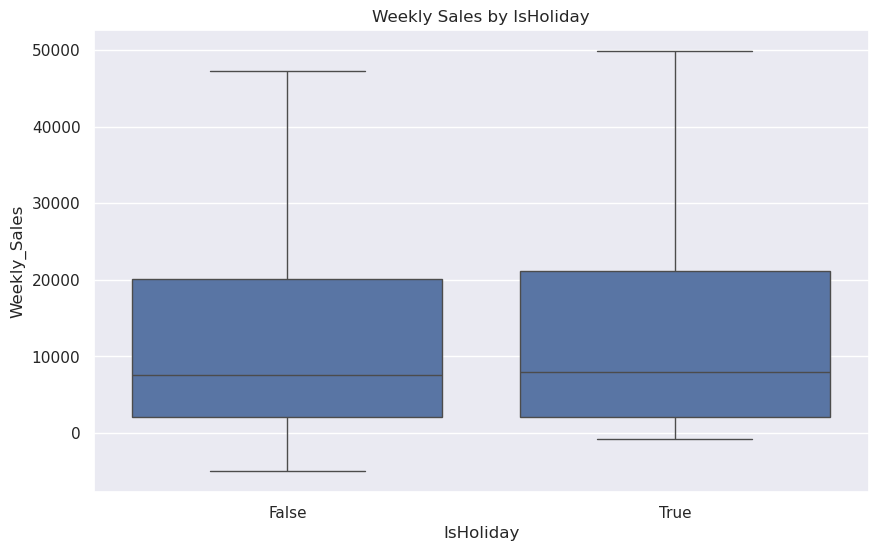

In [22]:
# boxplot of weekly sales by is holiday
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=train_df, showfliers=False)
plt.title('Weekly Sales by IsHoliday')
plt.show()

In [23]:
# Extract month
train_df['month'] = train_df['Date'].dt.month

# Extract week number
train_df['week'] = train_df['Date'].dt.isocalendar().week.astype("int32")

# Extract year
train_df['year'] = train_df['Date'].dt.year

train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,month,week,year
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2,5,2010
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2,6,2010
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2,7,2010
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2,8,2010
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,3,9,2010


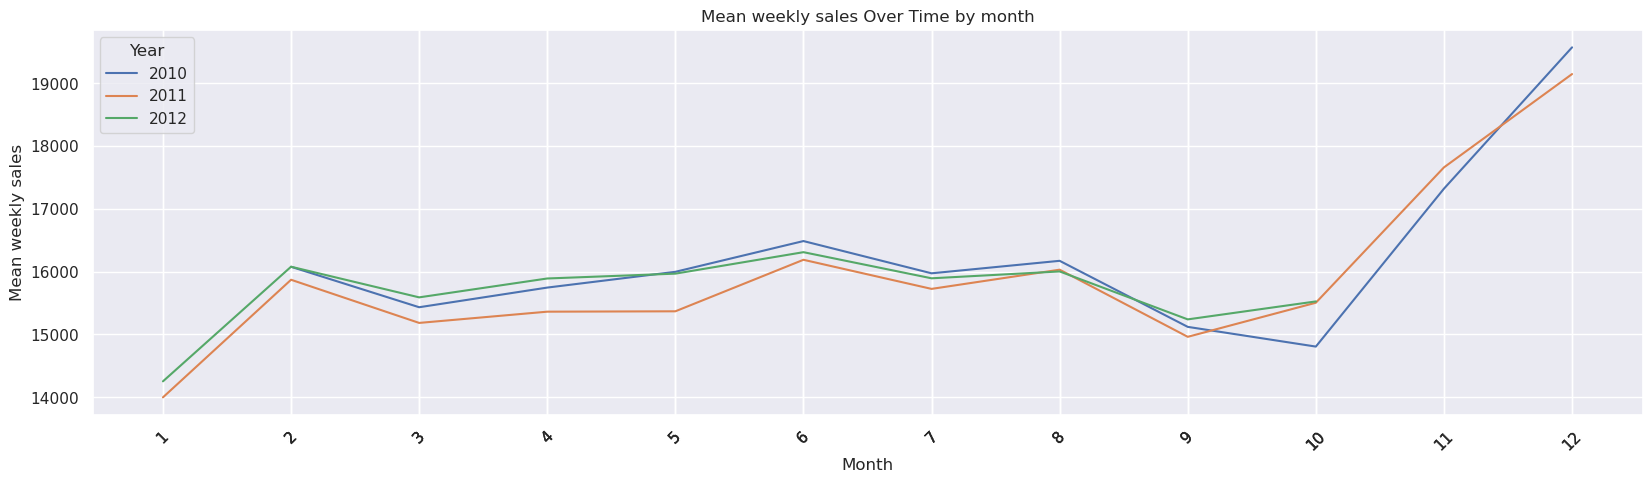

In [24]:
# mean store sales by month
mean_sales_by_month = train_df.groupby(['month', 'year'])[
    'Weekly_Sales'].mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(20, 5))
for label, grp in mean_sales_by_month.groupby('year'):
    ax.plot(grp['month'], grp['Weekly_Sales'], label=label)

ax.set_title('Mean weekly sales Over Time by month')
ax.set_xlabel('Month')
ax.set_ylabel('Mean weekly sales')
ax.legend(title='Year')
plt.xticks(ticks=mean_sales_by_month['month'],
           labels=mean_sales_by_month['month'], rotation=45)
plt.show()


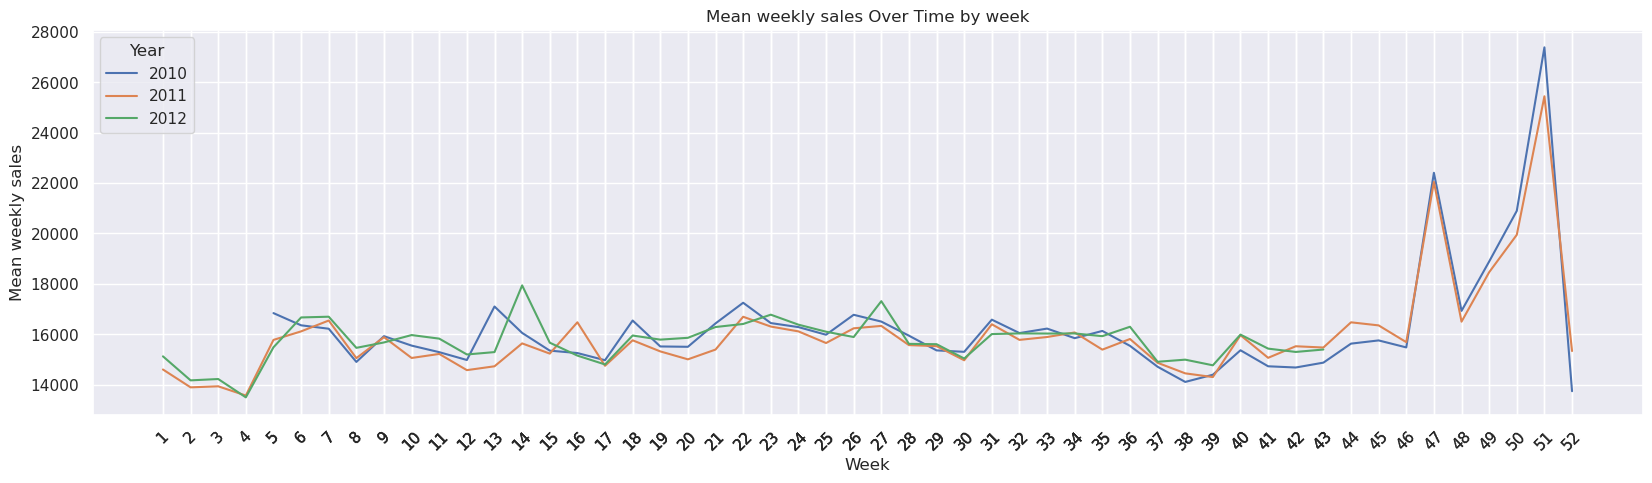

In [25]:
# mean store sales by week
mean_sales_by_week = train_df.groupby(['week', 'year'])[
    'Weekly_Sales'].mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(20, 5))
for label, grp in mean_sales_by_week.groupby('year'):
    ax.plot(grp['week'], grp['Weekly_Sales'], label=label)

ax.set_title('Mean weekly sales Over Time by week')
ax.set_xlabel('Week')
ax.set_ylabel('Mean weekly sales')
ax.legend(title='Year')
plt.xticks(ticks=mean_sales_by_week['week'],
           labels=mean_sales_by_week['week'], rotation=45)
plt.show()


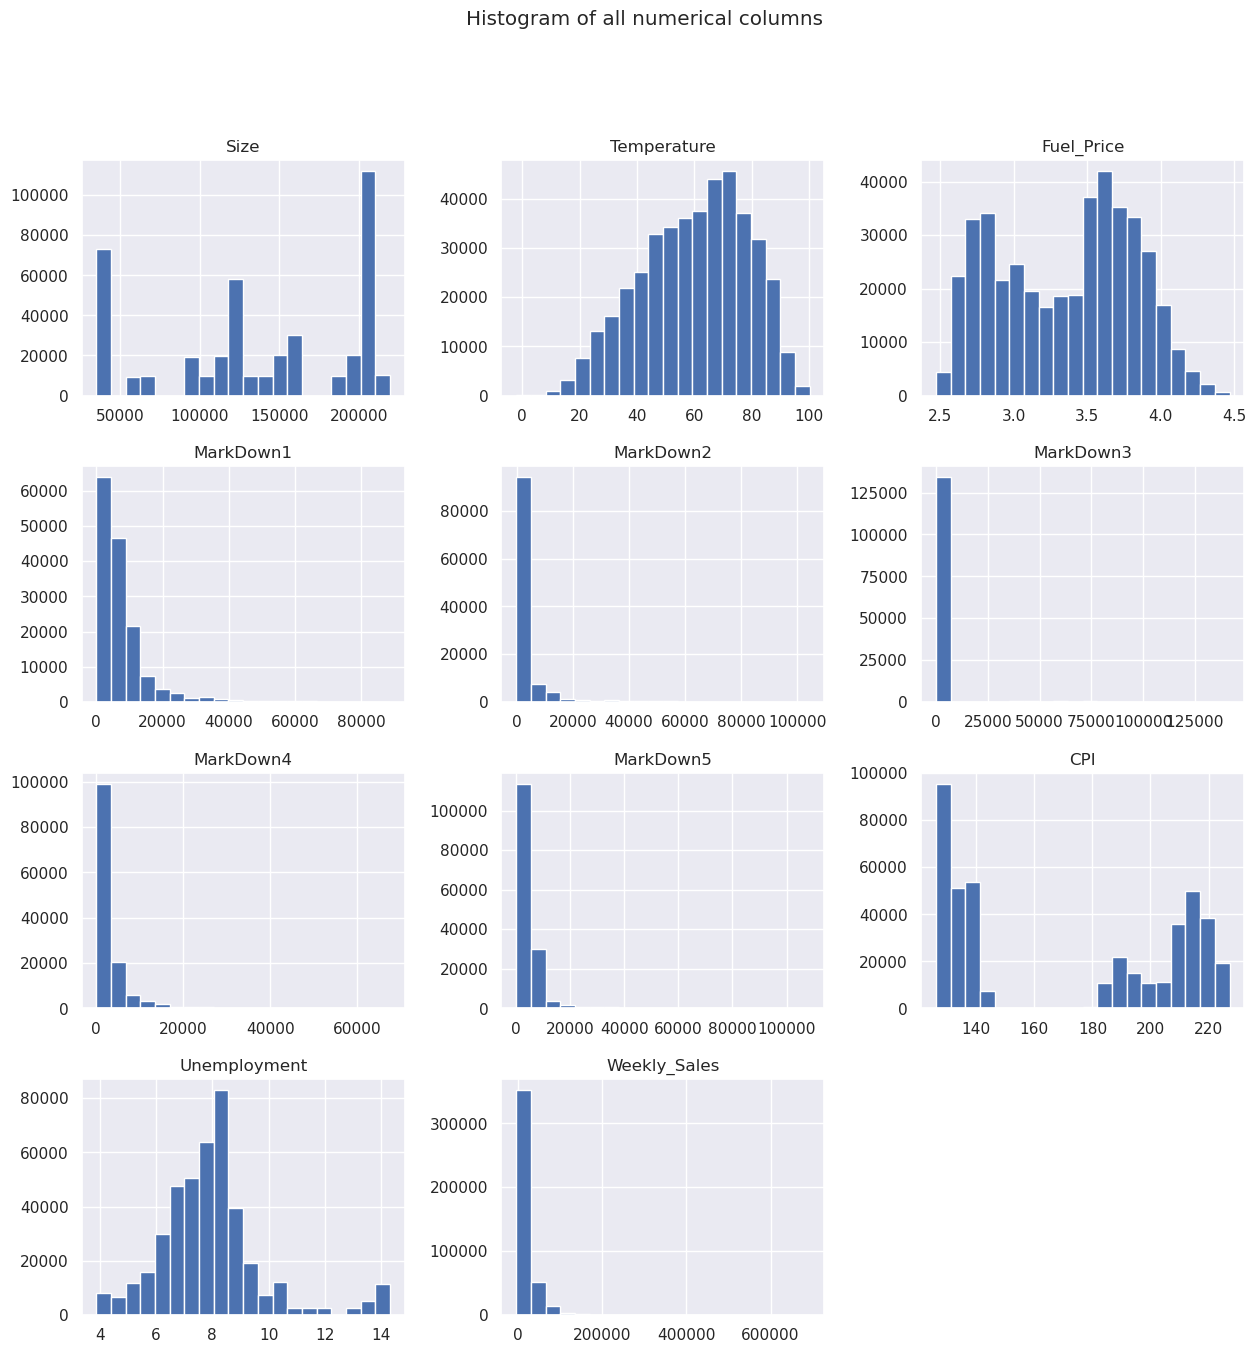

In [26]:
# histogram of all numerical columns i.e. size, temperature, fuel price, markdowns, CPI, unemployment, weekly sales.
train_df[['Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Weekly_Sales']].hist(
    figsize=(15, 15), bins=20)
plt.suptitle('Histogram of all numerical columns')
plt.show()


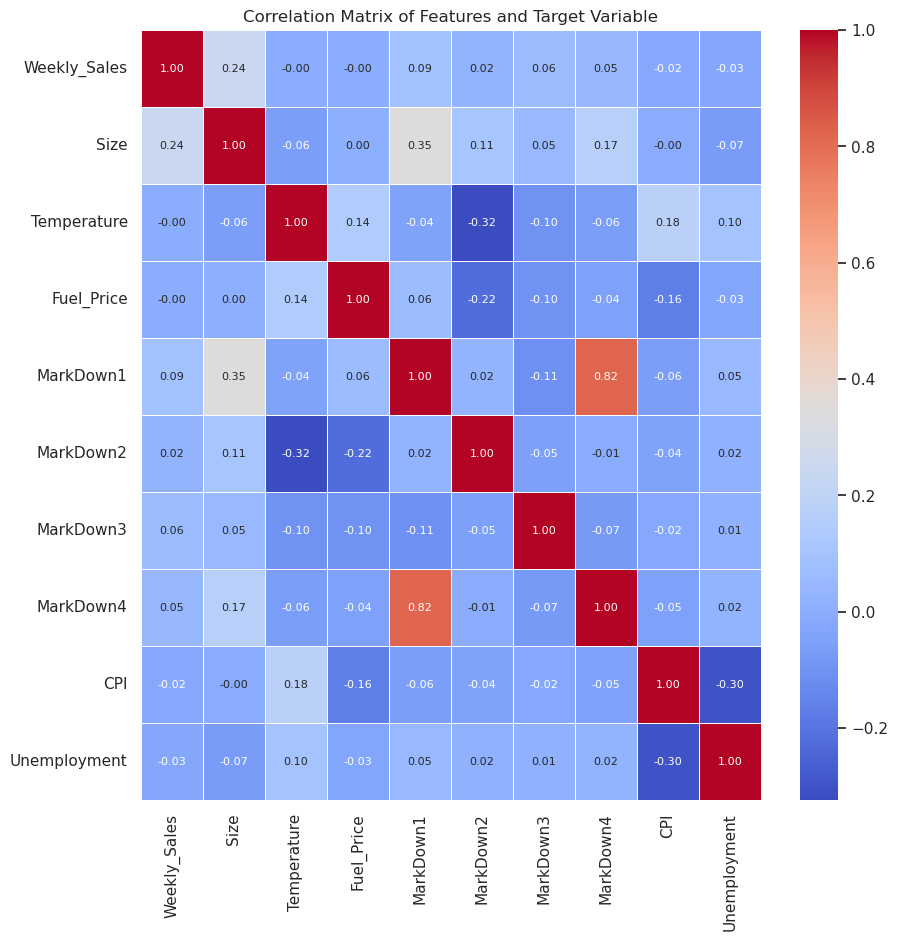

In [27]:
# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 10))  # Set the figure size for better readability
sns.heatmap(train_df[['Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'CPI', 'Unemployment']].corr(
    numeric_only=True), annot=True, annot_kws={'size': 8}, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar=True)
plt.title('Correlation Matrix of Features and Target Variable')
plt.show()

# Develop a benchmark model

In [10]:
# load the data
train_df = pd.read_csv(os.path.join(f'{PWD}/data', "train.csv"))
store_df = pd.read_csv(os.path.join(f'{PWD}/data', "stores.csv"))
feature_df = pd.read_csv(os.path.join(f'{PWD}/data', "features.csv"))

In [11]:
# transformations
train_df['Date'] = pd.to_datetime(train_df['Date'])
feature_df['Date'] = pd.to_datetime(feature_df['Date'])

# merge features
train_df = train_df.merge(store_df, how='left', on = 'Store').merge(feature_df, how='left', on=['Store', 'Date', 'IsHoliday'])

# feature engineering
train_df['month'] = train_df['Date'].dt.month
train_df['week'] = train_df['Date'].dt.isocalendar().week.astype("int32")
train_df['year'] = train_df['Date'].dt.year

train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,month,week,year
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2,5,2010
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2,6,2010
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2,7,2010
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2,8,2010
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,3,9,2010


In [12]:
# Remove markdown columns as linear regression does not support nulls
train_df.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1, inplace=True)
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,month,week,year
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,2,5,2010
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106,2,6,2010
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106,2,7,2010
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106,2,8,2010
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106,3,9,2010


In [13]:
# convert is holiday from boolean to 1/0
train_df['IsHoliday'] = train_df['IsHoliday'].astype(int)
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,month,week,year
0,1,1,2010-02-05,24924.50,0,A,151315,42.31,2.572,211.096358,8.106,2,5,2010
1,1,1,2010-02-12,46039.49,1,A,151315,38.51,2.548,211.242170,8.106,2,6,2010
2,1,1,2010-02-19,41595.55,0,A,151315,39.93,2.514,211.289143,8.106,2,7,2010
3,1,1,2010-02-26,19403.54,0,A,151315,46.63,2.561,211.319643,8.106,2,8,2010
4,1,1,2010-03-05,21827.90,0,A,151315,46.50,2.625,211.350143,8.106,3,9,2010


In [14]:
# list of all numerical columns
num_features = ['Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'month', 'week', 'year']
# list of all categorical columns
cat_features = ['Store', 'Dept', 'Type']
target_var = ['Weekly_Sales']

In [15]:
# encode categorical variables (store/dept/type/isholiday) using one hot encoding from sklearn
from sklearn.preprocessing import OneHotEncoder

# create an instance of one hot encoder
encoder = OneHotEncoder()

# fit and transform the data
train_df_encoded = encoder.fit_transform(train_df[cat_features])
train_df_encoded = pd.DataFrame(train_df_encoded.toarray(), columns=encoder.get_feature_names_out(cat_features))

# merge the encoded data with the original data
train_df = pd.concat([train_df, train_df_encoded], axis=1)

# drop the original columns
train_df.drop(cat_features, axis=1, inplace=True)

# get the new categorical column names from the encoder
cat_feature_names = encoder.get_feature_names_out(cat_features)

# check the first few rows of the data
train_df.head()

,Date,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,CPI,Unemployment,month,week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
0,2010-02-05,24924.50,0,151315,42.31,2.572,211.096358,8.106,2,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2010-02-12,46039.49,1,151315,38.51,2.548,211.242170,8.106,2,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2010-02-19,41595.55,0,151315,39.93,2.514,211.289143,8.106,2,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2010-02-26,19403.54,0,151315,46.63,2.561,211.319643,8.106,2,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2010-03-05,21827.90,0,151315,46.50,2.625,211.350143,8.106,3,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
# normalise the numerical columns and split the data into trainining, set features and target. Keep in mind that since it is time series data; so test data should be after train data
from sklearn.preprocessing import StandardScaler

# create an instance of standard scaler
scaler = StandardScaler()

# normalise the numerical columns
train_df[num_features] = scaler.fit_transform(train_df[num_features])

train_df.head()

,Date,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,CPI,Unemployment,month,week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
0,2010-02-05,24924.50,0,0.239209,-0.963798,-1.720834,1.018774,0.078201,-1.371945,-1.471661,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2010-02-12,46039.49,1,0.239209,-1.169783,-1.773177,1.022498,0.078201,-1.371945,-1.400999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2010-02-19,41595.55,0,0.239209,-1.092810,-1.847330,1.023697,0.078201,-1.371945,-1.330337,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2010-02-26,19403.54,0,0.239209,-0.729625,-1.744825,1.024476,0.078201,-1.371945,-1.259675,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2010-03-05,21827.90,0,0.239209,-0.736672,-1.605243,1.025255,0.078201,-1.063609,-1.189013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [17]:
# split the data into training and test data
train_data = train_df[train_df['Date'] < '2012-09-01']
test_data = train_df[train_df['Date'] >= '2012-09-01']

# split the data into features and target
X_train = train_data.drop(['Date', 'Weekly_Sales'], axis=1)
y_train = train_data['Weekly_Sales']

# split the data into features and target
X_test = test_data.drop(['Date', 'Weekly_Sales'], axis=1)
y_test = test_data['Weekly_Sales']

# check the shape of the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((397841, 138), (397841,), (23729, 138), (23729,))

In [90]:
# train a linear regression model
from sklearn.linear_model import LinearRegression

# create an instance of linear regression
model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

# Calculate train/test RMSE
from sklearn.metrics import mean_squared_error

# predict the train and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# calculate the train and test RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# print
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train RMSE: 13356.800009700337
Test RMSE: 11905.788761228314


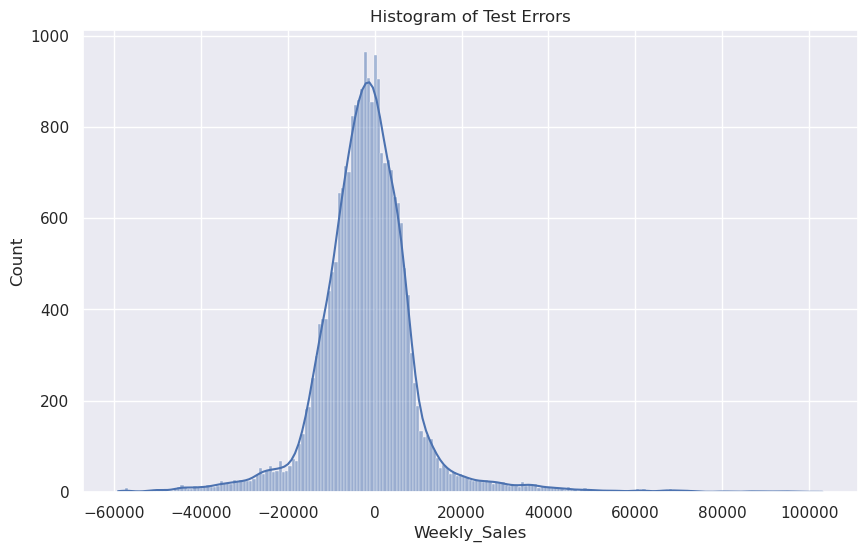

In [92]:
# plot a histogram of the test errors
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_test_pred, kde=True)
plt.title('Histogram of Test Errors')
plt.show()

In [ ]:
# train a random forest regressor
from sklearn.ensemble import RandomForestRegressor

# create an instance of random forest regressor with 100 trees
model = RandomForestRegressor(n_estimators=100, random_state=42)

# fit the model
model.fit(X_train, y_train)

# predict the train and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [19]:
# Calculate train/test RMSE
from sklearn.metrics import mean_squared_error

# calculate the train and test RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# print
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train RMSE: 1302.2779548133092
Test RMSE: 3230.2856697232323


# Engineer new features

In [ ]:
# load the data
train_df = pd.read_csv(os.path.join(f'{PWD}/data', "train.csv"))
store_df = pd.read_csv(os.path.join(f'{PWD}/data', "stores.csv"))
feature_df = pd.read_csv(os.path.join(f'{PWD}/data', "features.csv"))

In [ ]:
# transformations
train_df['Date'] = pd.to_datetime(train_df['Date'])
feature_df['Date'] = pd.to_datetime(feature_df['Date'])

# merge features
train_df = train_df.merge(store_df, how='left', on = 'Store').merge(feature_df, how='left', on=['Store', 'Date', 'IsHoliday'])

# feature engineering
train_df['month'] = train_df['Date'].dt.month
train_df['week'] = train_df['Date'].dt.isocalendar().week.astype("int32")
train_df['year'] = train_df['Date'].dt.year

# convert is holiday from boolean to 1/0
train_df['IsHoliday'] = train_df['IsHoliday'].astype(int)x

train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,month,week,year
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2,5,2010
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2,6,2010
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2,7,2010
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2,8,2010
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,3,9,2010


In [41]:
# sort train data by store, department and date
train_df = train_df.sort_values(by=['Store', 'Dept', 'Date'])

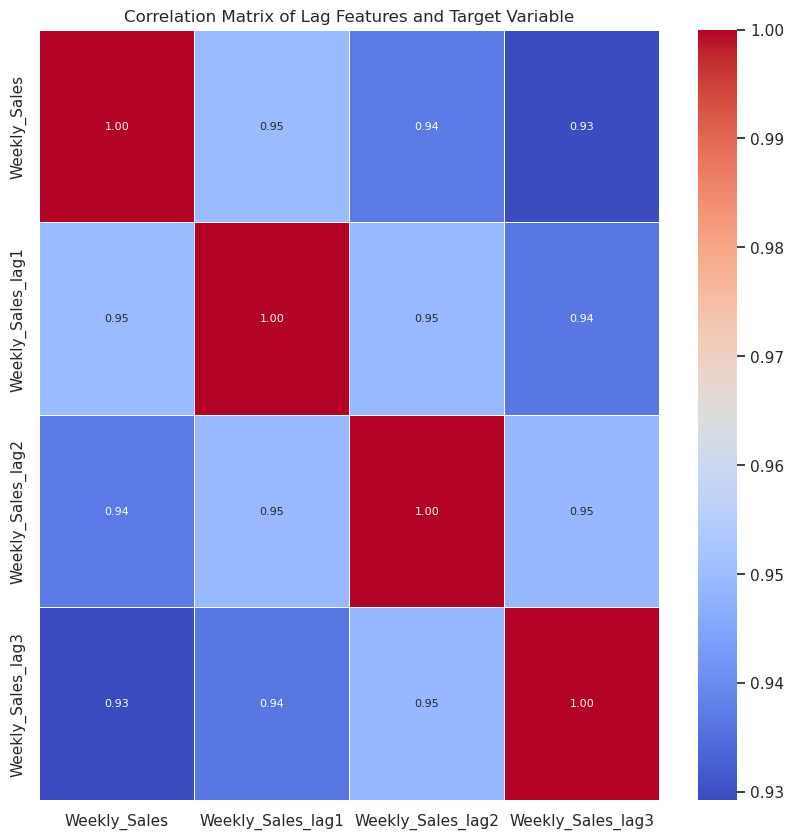

In [42]:
# eda to see if lag features are useful
train_df['Weekly_Sales_lag1'] = train_df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1)
train_df['Weekly_Sales_lag2'] = train_df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(2)
train_df['Weekly_Sales_lag3'] = train_df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(3)

# plot the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(train_df[['Weekly_Sales', 'Weekly_Sales_lag1', 'Weekly_Sales_lag2', 'Weekly_Sales_lag3']].corr(
    numeric_only=True), annot=True, annot_kws={'size': 8}, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar=True)
plt.title('Correlation Matrix of Lag Features and Target Variable')
plt.show()

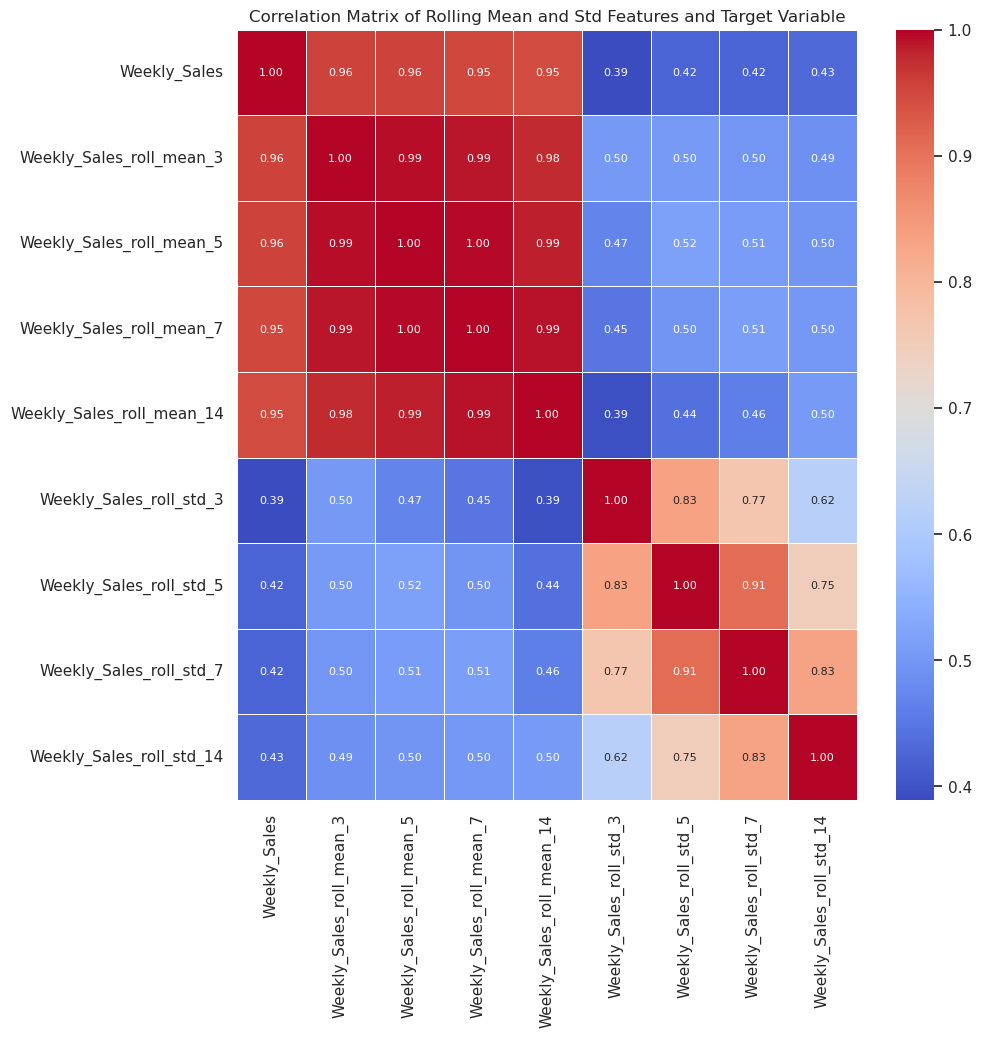

In [43]:
# eda to see if rolling mean and std features are useful at different windows. need to make sure not to use future data
train_df['Weekly_Sales_roll_mean_3'] = train_df.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.shift(1).rolling(window=3).mean())
train_df['Weekly_Sales_roll_mean_5'] = train_df.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.shift(1).rolling(window=5).mean())
train_df['Weekly_Sales_roll_mean_7'] = train_df.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.shift(1).rolling(window=7).mean())
train_df['Weekly_Sales_roll_mean_14'] = train_df.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.shift(1).rolling(window=14).mean())

train_df['Weekly_Sales_roll_std_3'] = train_df.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.shift(1).rolling(window=3).std())
train_df['Weekly_Sales_roll_std_5'] = train_df.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.shift(1).rolling(window=5).std())
train_df['Weekly_Sales_roll_std_7'] = train_df.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.shift(1).rolling(window=7).std())
train_df['Weekly_Sales_roll_std_14'] = train_df.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.shift(1).rolling(window=14).std())

# plot the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(train_df[['Weekly_Sales', 'Weekly_Sales_roll_mean_3', 'Weekly_Sales_roll_mean_5', 'Weekly_Sales_roll_mean_7', 'Weekly_Sales_roll_mean_14', 'Weekly_Sales_roll_std_3', 'Weekly_Sales_roll_std_5', 'Weekly_Sales_roll_std_7', 'Weekly_Sales_roll_std_14']].corr(
    numeric_only=True), annot=True, annot_kws={'size': 8}, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar=True)
plt.title('Correlation Matrix of Rolling Mean and Std Features and Target Variable')
plt.show()


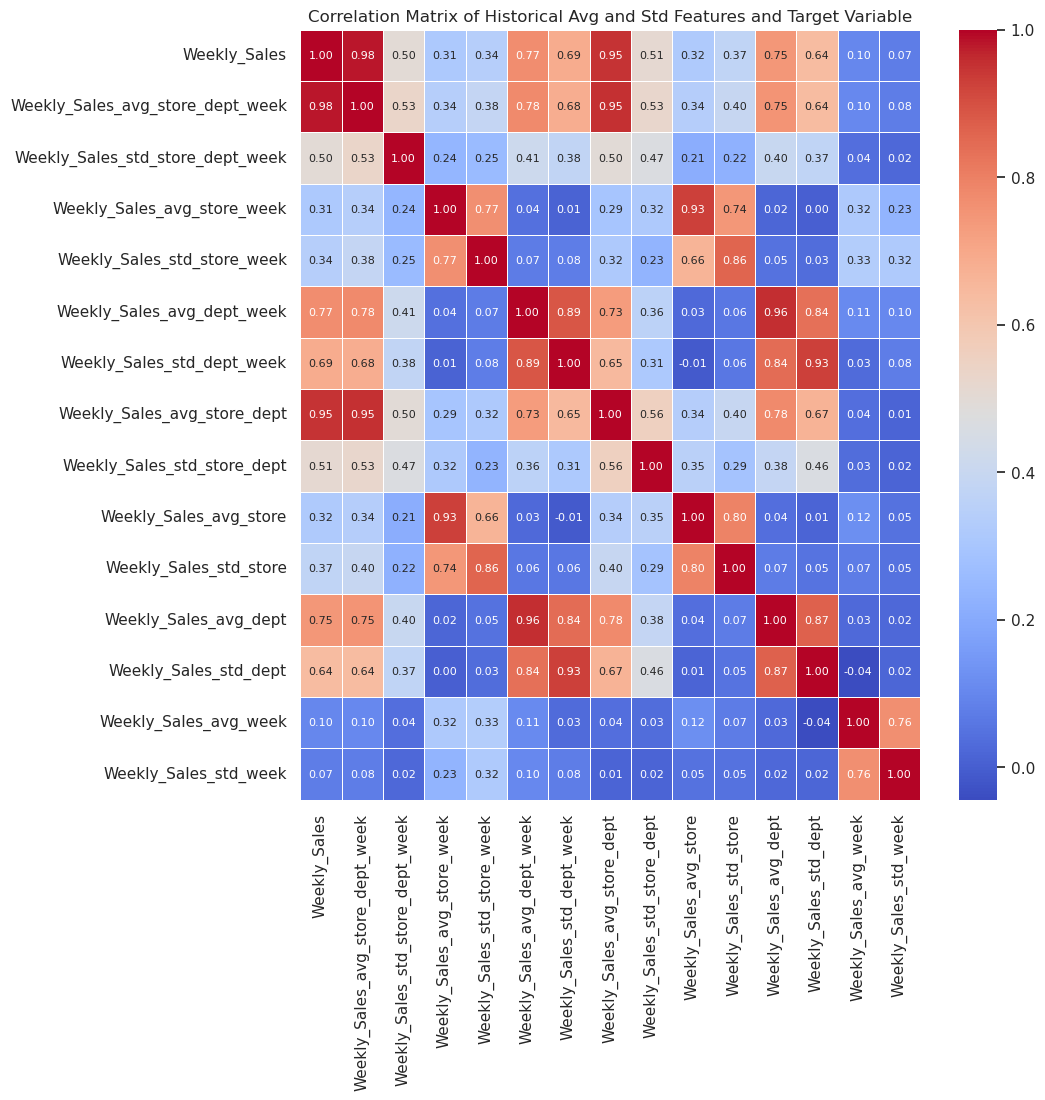

In [44]:
# calculate historical avg and std at store/dept/week, store/week, dept/week, store/dept, store, dept, week. For each row we have to make sure not to use future data
train_df['Weekly_Sales_avg_store_dept_week'] = train_df.groupby(['Store', 'Dept', 'week'])['Weekly_Sales'].transform(lambda x: x.shift(1).expanding().mean())
train_df['Weekly_Sales_std_store_dept_week'] = train_df.groupby(['Store', 'Dept', 'week'])['Weekly_Sales'].transform(lambda x: x.shift(1).expanding().std())

train_df['Weekly_Sales_avg_store_week'] = train_df.groupby(['Store', 'week'])['Weekly_Sales'].transform(lambda x: x.shift(1).expanding().mean())
train_df['Weekly_Sales_std_store_week'] = train_df.groupby(['Store', 'week'])['Weekly_Sales'].transform(lambda x: x.shift(1).expanding().std())

train_df['Weekly_Sales_avg_dept_week'] = train_df.groupby(['Dept', 'week'])['Weekly_Sales'].transform(lambda x: x.shift(1).expanding().mean())
train_df['Weekly_Sales_std_dept_week'] = train_df.groupby(['Dept', 'week'])['Weekly_Sales'].transform(lambda x: x.shift(1).expanding().std())

train_df['Weekly_Sales_avg_store_dept'] = train_df.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.shift(1).expanding().mean())
train_df['Weekly_Sales_std_store_dept'] = train_df.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.shift(1).expanding().std())

train_df['Weekly_Sales_avg_store'] = train_df.groupby(['Store'])['Weekly_Sales'].transform(lambda x: x.shift(1).expanding().mean())
train_df['Weekly_Sales_std_store'] = train_df.groupby(['Store'])['Weekly_Sales'].transform(lambda x: x.shift(1).expanding().std())

train_df['Weekly_Sales_avg_dept'] = train_df.groupby(['Dept'])['Weekly_Sales'].transform(lambda x: x.shift(1).expanding().mean())
train_df['Weekly_Sales_std_dept'] = train_df.groupby(['Dept'])['Weekly_Sales'].transform(lambda x: x.shift(1).expanding().std())

train_df['Weekly_Sales_avg_week'] = train_df.groupby(['week'])['Weekly_Sales'].transform(lambda x: x.shift(1).expanding().mean())
train_df['Weekly_Sales_std_week'] = train_df.groupby(['week'])['Weekly_Sales'].transform(lambda x: x.shift(1).expanding().std())

# plot the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(train_df[['Weekly_Sales', 'Weekly_Sales_avg_store_dept_week', 'Weekly_Sales_std_store_dept_week', 'Weekly_Sales_avg_store_week', 'Weekly_Sales_std_store_week', 'Weekly_Sales_avg_dept_week', 'Weekly_Sales_std_dept_week', 'Weekly_Sales_avg_store_dept', 'Weekly_Sales_std_store_dept', 'Weekly_Sales_avg_store', 'Weekly_Sales_std_store', 'Weekly_Sales_avg_dept', 'Weekly_Sales_std_dept', 'Weekly_Sales_avg_week', 'Weekly_Sales_std_week']].corr(
    numeric_only=True), annot=True, annot_kws={'size': 8}, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar=True)
plt.title('Correlation Matrix of Historical Avg and Std Features and Target Variable')
plt.show()

In [ ]:
# list of all numerical columns
num_features = ['Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 
            'CPI', 'Unemployment', 'month', 'week', 'year', 'Weekly_Sales_lag1', 
            'Weekly_Sales_lag2', 'Weekly_Sales_lag3', 'Weekly_Sales_roll_mean_3', 'Weekly_Sales_roll_mean_5', 
            'Weekly_Sales_roll_mean_7', 'Weekly_Sales_roll_mean_14', 'Weekly_Sales_roll_std_3', 'Weekly_Sales_roll_std_5', 
            'Weekly_Sales_roll_std_7', 'Weekly_Sales_roll_std_14', 'Weekly_Sales_avg_store_dept_week', 'Weekly_Sales_std_store_dept_week', 
            'Weekly_Sales_avg_store_week', 'Weekly_Sales_std_store_week', 'Weekly_Sales_avg_dept_week', 'Weekly_Sales_std_dept_week', 
            'Weekly_Sales_avg_store_dept', 'Weekly_Sales_std_store_dept', 'Weekly_Sales_avg_store', 'Weekly_Sales_std_store', 
            'Weekly_Sales_avg_dept', 'Weekly_Sales_std_dept', 'Weekly_Sales_avg_week', 'Weekly_Sales_std_week']

# list of all categorical columns
cat_features = ['Store', 'Dept', 'Type', 'IsHoliday']

target_var = ['Weekly_Sales']


In [46]:
# encode categorical variables (store/dept/type) using one hot encoding from sklearn
from sklearn.preprocessing import OneHotEncoder

# create an instance of one hot encoder
encoder = OneHotEncoder()

# fit and transform the data
train_df_encoded = encoder.fit_transform(train_df[['Store', 'Dept', 'Type']])
train_df_encoded = pd.DataFrame(train_df_encoded.toarray(), columns=encoder.get_feature_names_out(['Store', 'Dept', 'Type']))

# merge the encoded data with the original data
train_df = pd.concat([train_df, train_df_encoded], axis=1)

# drop the original columns
train_df.drop(['Store', 'Dept', 'Type'], axis=1, inplace=True)

# check the first few rows of the data
train_df.head()

,Date,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
0,2010-02-05,24924.50,False,151315,42.31,2.572,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2010-02-12,46039.49,True,151315,38.51,2.548,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2010-02-19,41595.55,False,151315,39.93,2.514,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2010-02-26,19403.54,False,151315,46.63,2.561,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2010-03-05,21827.90,False,151315,46.50,2.625,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [53]:
# normalise the numerical columns and split the data into trainining, set features and target. Keep in mind that since it is time series data test data should be after train data
from sklearn.preprocessing import StandardScaler

# create an instance of standard scaler
scaler = StandardScaler()

# normalise the numerical columns
train_df[num_features] = scaler.fit_transform(train_df[num_features])

# split the data into training and test data
train_data = train_df[train_df['Date'] < '2012-09-01']
test_data = train_df[train_df['Date'] >= '2012-09-01']

# split the data into features and target
X_train = train_data.drop(['Date', 'Weekly_Sales'], axis=1)
y_train = train_data['Weekly_Sales']

# split the data into features and target
X_test = test_data.drop(['Date', 'Weekly_Sales'], axis=1)
y_test = test_data['Weekly_Sales']

# check the shape of the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((397841, 168), (397841,), (23729, 168), (23729,))

# Gradient Boosting Model

In [55]:
# train an xgboost model with sklearn, print test and train rmse every round while training and plot overfitting graphs
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# create an instance of xgboost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# train the model
xgb_model.fit(X_train, y_train)

# make predictions
y_train_pred = xgb_model.predict(X_train)

# calculate rmse
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# make predictions
y_test_pred = xgb_model.predict(X_test)

# calculate rmse
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# print the rmse
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 3203.502442287165
Test RMSE: 2559.4173169701103


In [38]:
# save the trained model
import joblib

# save the model
joblib.dump(model, 'model.pkl')

['model.pkl']

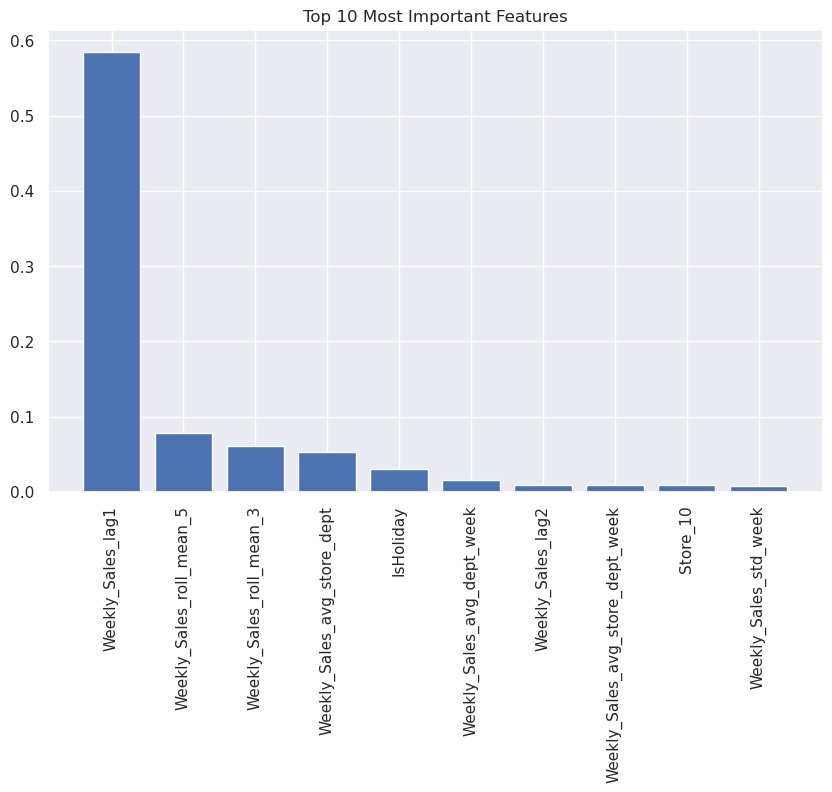

In [37]:
# plot top 10 most important features
importance = model.feature_importances_
indices = np.argsort(importance)[::-1][:10]

plt.figure(figsize=(10, 6))
plt.bar(range(10), importance[indices], align='center')
plt.xticks(range(10), X_train.columns[indices], rotation=90)
plt.title('Top 10 Most Important Features')
plt.show()


# Hyperparameter tuning

In [39]:
# tune the hyperparameters using grid search
from sklearn.model_selection import GridSearchCV

# create an instance of the xgboost regressor
model = XGBRegressor()

# define the grid
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3]
}

# create an instance of grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# fit the model
grid_search.fit(X_train, y_train)

# get the best parameters
grid_search.best_params_

# make predictions
train_preds = grid_search.predict(X_train)

# calculate the rmse
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))

# make predictions
test_preds = grid_search.predict(X_test)

# calculate the rmse
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

# print the rmse
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

In [12]:
# use sklearn to develop a pipeline to preprocess the data and train the model
# the pipeline should load the csv datasets, merge them, do all the transformations as necessary, do the feature engineering we did before (date features, lag features, rolling features, expanding features)
# then it should preprocess the data (one hot encoding, standard scaling), split the data into training and test data, train the model and save the model

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import joblib

class LoadData(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # load the data
        train_df = pd.read_csv('train.csv')
        store_df = pd.read_csv('stores.csv')
        feature_df = pd.read_csv('features.csv')

        # merge the data
        train_df = train_df.merge(store_df, how='left', on='Store').merge(feature_df, how='left', on=['Store', 'Date', 'IsHoliday'])

        return train_df
    
class FeatureEngineering(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # extract month
        X['month'] = pd.to_datetime(X['Date']).dt.month

        # extract week number
        X['week'] = pd.to_datetime(X['Date']).dt.isocalendar().week.astype("int32")

        # extract year
        X['year'] = pd.to_datetime(X['Date']).dt.year

        # sort the data
        X = X.sort_values(by=['Store', 'Dept', 'Date'])

        # lag features
        X['Weekly_Sales_lag1'] = X.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1)
        X['Weekly_Sales_lag2'] = X.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(2)
        X['Weekly_Sales_lag3'] = X.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(3)

        # rolling mean and std features
        X['Weekly_Sales_roll_mean_3'] = X.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.shift(1).rolling(window=3).mean())
        X['Weekly_Sales_roll_mean_5'] = X.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.shift(1).rolling(window=5).mean())
        X['Weekly_Sales_roll_mean_7'] = X.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.shift(1).rolling(window=7).mean())
        X['Weekly_Sales_roll_mean_14'] = X.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.shift(1).rolling(window=14).mean())

        X['Weekly_Sales_roll_std_3'] = X.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.shift(1).rolling(window=3).std())
        X['Weekly_Sales_roll_std_5'] = X.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.shift(1).rolling(window=5).std())
        X['Weekly_Sales_roll_std_7'] = X.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.shift(1).rolling(window=7).std())
        X['Weekly_Sales_roll_std_14'] = X.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.shift(1).rolling(window=14).std())

        # historical avg and std features
        X['Weekly_Sales_avg_store_dept_week'] = X.groupby(['Store', 'Dept', 'week'])['Weekly_Sales'].transform(lambda x: x.shift(1).expanding().mean())
        X['Weekly_Sales_std_store_dept_week'] = X.groupby(['Store', 'Dept', 'week'])['Weekly_Sales'].transform(lambda x: x.shift(1).expanding().std())

        X['Weekly_Sales_avg_store_week'] = X.groupby(['Store', 'week'])['Weekly_Sales'].transform(lambda x: x.shift(1).expanding().mean())
        X['Weekly_Sales_std_store_week'] = X.groupby(['Store', 'week'])['Weekly_Sales'].transform(lambda x: x.shift(1).expanding().std())

        X['Weekly_Sales_avg_dept_week'] = X.groupby(['Dept', 'week'])['Weekly_Sales'].transform(lambda x: x.shift(1).expanding().mean())
        X['Weekly_Sales_std_dept_week'] = X.groupby(['Dept', 'week'])['Weekly_Sales'].transform(lambda x: x.shift(1).expanding().std())

        X['Weekly_Sales_avg_store_dept'] = X.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.shift(1).expanding().mean())
        X['Weekly_Sales_std_store_dept'] = X.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.shift(1).expanding().std())

        X['Weekly_Sales_avg_store'] = X.groupby(['Store'])['Weekly_Sales'].transform(lambda x: x.shift(1).expanding().mean())
        X['Weekly_Sales_std_store'] = X.groupby(['Store'])['Weekly_Sales'].transform(lambda x: x.shift(1).expanding().std())

        X['Weekly_Sales_avg_dept'] = X.groupby(['Dept'])['Weekly_Sales'].transform(lambda x: x.shift(1).expanding().mean())
        X['Weekly_Sales_std_dept'] = X.groupby(['Dept'])['Weekly_Sales'].transform(lambda x: x.shift(1).expanding().std())

        X['Weekly_Sales_avg_week'] = X.groupby(['week'])['Weekly_Sales'].transform(lambda x: x.shift(1).expanding().mean())
        X['Weekly_Sales_std_week'] = X.groupby(['week'])['Weekly_Sales'].transform(lambda x: x.shift(1).expanding().std())

        return X
    
class PreprocessData(BaseEstimator, TransformerMixin):
    
        def fit(self, X, y=None):
            return self
    
        def transform(self, X, y=None):
            # encode categorical variables
            encoder = OneHotEncoder()
            X_encoded = encoder.fit_transform(X[['Store', 'Dept', 'Type']])
            X_encoded = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out(['Store', 'Dept', 'Type']))
    
            # merge the encoded data with the original data
            X = pd.concat([X, X_encoded], axis=1)
    
            # drop the original columns
            X.drop(['Store', 'Dept', 'Type'], axis=1, inplace=True)
    
            # list of all numerical columns
            num_features = ['Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 
                'CPI', 'Unemployment', 'IsHoliday', 'month', 'week', 'year', 'Weekly_Sales_lag1', 
                'Weekly_Sales_lag2', 'Weekly_Sales_lag3', 'Weekly_Sales_roll_mean_3', 'Weekly_Sales_roll_mean_5', 
                'Weekly_Sales_roll_mean_7', 'Weekly_Sales_roll_mean_14', 'Weekly_Sales_roll_std_3', 'Weekly_Sales_roll_std_5', 
                'Weekly_Sales_roll_std_7', 'Weekly_Sales_roll_std_14', 'Weekly_Sales_avg_store_dept_week', 'Weekly_Sales_std_store_dept_week', 
                'Weekly_Sales_avg_store_week', 'Weekly_Sales_std_store_week', 'Weekly_Sales_avg_dept_week', 'Weekly_Sales_std_dept_week', 
                'Weekly_Sales_avg_store_dept', 'Weekly_Sales_std_store_dept', 'Weekly_Sales_avg_store', 'Weekly_Sales_std_store', 
                'Weekly_Sales_avg_dept', 'Weekly_Sales_std_dept', 'Weekly_Sales_avg_week', 'Weekly_Sales_std_week']
    
            # list of all categorical columns 
            cat_features = X.columns[~X.columns.isin(num_features)].tolist()
    
            # create an instance of standard scaler
            scaler = StandardScaler()
    
            # normalise the numerical columns
            X[num_features] = scaler.fit_transform(X[num_features])

            return X
        
class TrainModel(BaseEstimator, TransformerMixin):
        
        def fit(self, X, y=None):
            return self
        
        def transform(self, X, y=None):
            # split the data into training and test data
            X_train = X[X['Date'] < '2012-09-01']
    
            # split the data into features and target
            y_train = X_train['Weekly_Sales']
            X_train = X_train.drop(['Date', 'Weekly_Sales'], axis=1)
    
            # split the data into training and test data
            X_test = X[X['Date'] >= '2012-09-01']
    
            # split the data into features and target
            y_test = X_test['Weekly_Sales']
            X_test = X_test.drop(['Date', 'Weekly_Sales'], axis=1)
    
            # create an instance of the xgboost regressor
            model = XGBRegressor()
    
            # fit the model
            model.fit(X_train, y_train)
    
            # make predictions
            train_preds = model.predict(X_train)
    
            # calculate the rmse
            train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
    
            # make predictions
            test_preds = model.predict(X_test)
    
            # calculate the rmse
            test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
    
            # save the model
            joblib.dump(model, 'model.pkl')
    
            return train_rmse, test_rmse
        
# create a pipeline
pipeline = Pipeline([
    ('load_data', LoadData()),
    ('feature_engineering', FeatureEngineering()),
    ('preprocess_data', PreprocessData()),
    ('train_model', TrainModel())
])

In [13]:
# fit the pipeline
train_rmse, test_rmse = pipeline.fit_transform(None)

# print the rmse
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 3203.502442287165
Test RMSE: 2559.4173169701103
